In [4]:
import pandas as pd 
import numpy as np


df = pd.read_csv('data/titanic_train.csv')

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.shape,'\n'*2,df.columns, '\n'*2)
df.info()

(891, 12) 

 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.sort_values(by=["Pclass", 'Sex'], ascending=[True, True]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [7]:
df[['PassengerId', 'Survived', 'Pclass','Name', 'Sex', 'SibSp', 'Parch', 
    'Ticket', 'Fare']].apply(np.max)

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

Демонстрация основных меотдов Seabootn и Plotly


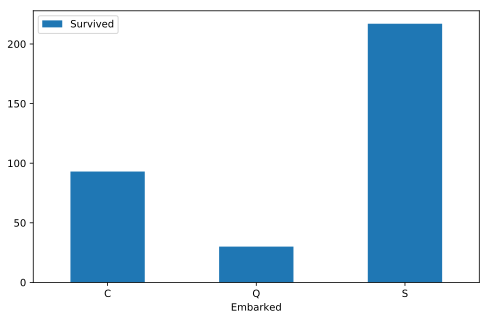

In [8]:
print("Демонстрация основных меотдов Seabootn и Plotly")

import warnings
warnings.simplefilter('ignore')

%matplotlib inline 

import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5 


cols=['Survived', 'Embarked']
df[cols].groupby('Embarked').sum().plot(kind="bar", rot=360)

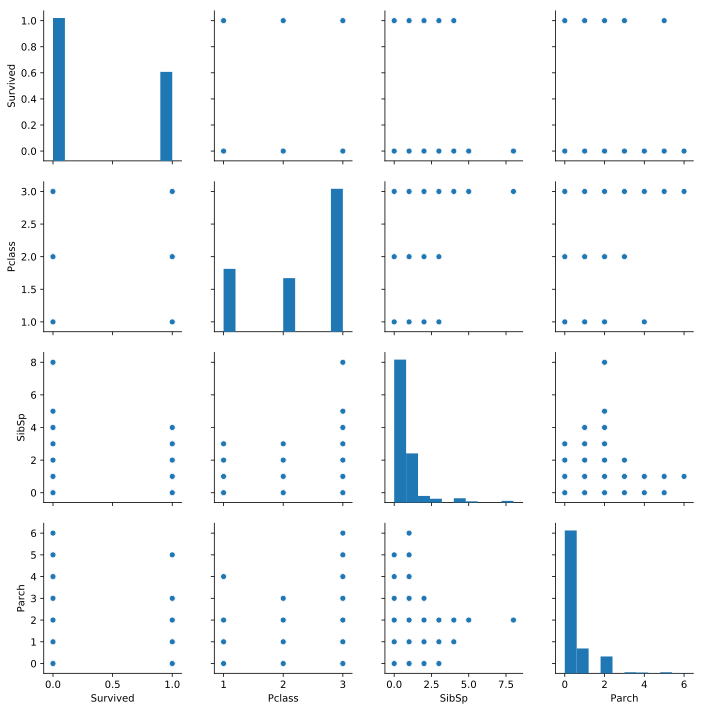

In [9]:
cols = ['Survived','Pclass', 'SibSp', 'Parch' ] 
sns_plot = sns.pairplot(df[cols])

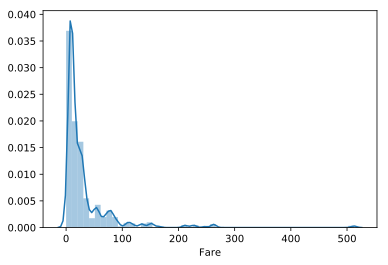

In [10]:
sns.distplot(df.Fare)

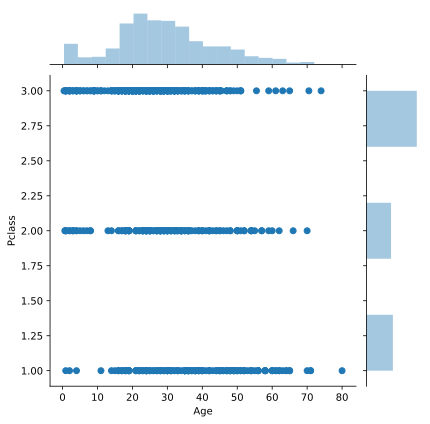

In [11]:
sns.jointplot(df.Age, df.Pclass)

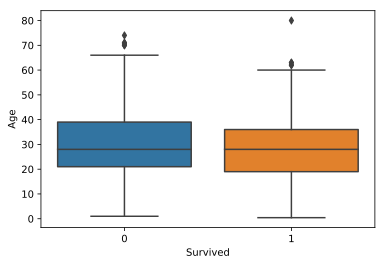

In [12]:
sns.boxplot(df.Survived, df.Age)

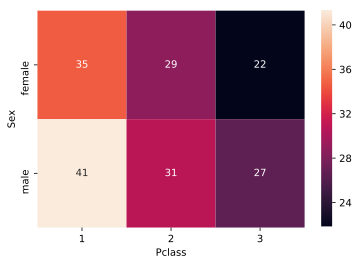

In [13]:
this = df.pivot_table(
    index='Sex',
    columns='Pclass',
    values='Age',
    aggfunc=np.mean).fillna(0)

sns.heatmap(this, annot=True)

In [55]:
print("Plotly")
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

ds = df[['Fare','Cabin']].groupby('Cabin')[['Fare']].median().join(
    df[['Age','Cabin']].groupby('Cabin')[['Age']].mean()
)
trace0 = go.Scatter(
    x=ds.index,
    y=ds.Fare,
    name="Fare_of_Cabin"
)
trace1=go.Scatter(
    x=ds.index,
    y=ds.Age,
    name="Cabin_of_Age"
)
data = [trace0, trace1]

fig = go.Figure(data=data, layout={'title':'something'})
iplot(fig)





Plotly


In [65]:
ds = df[['Survived','Pclass']].groupby('Pclass')[['Survived']].sum()


trace0 = go.Bar(
    x=ds.index,
    y=ds.Survived,
    name="Survived_Pclass"
)


fig = go.Figure(data=[trace0], layout={'title':'something2', 
                                   'xaxis':{'title':'ThisISBar'}})
iplot(fig)


In [73]:
trace0 = go.Box(
    #x=df.Age,
    y=ds.Survived,
    name="Survived"
)


#fig = go.Figure(data=[trace0], layout={'title':'something2'}
iplot([trace0])


In [95]:
data = []
for pclass in df.Pclass.unique():
    data.append(
        go.Box(y=df[df.Pclass == pclass].Age, name=str(pclass))
    )
iplot(data)